## Import and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import iqr

%matplotlib inline

## The Codes
 Univariate Outlier Detection by Boxplot

In [23]:
np.random.seed(3147)
# x = np.random.randint(low = 1, high = 10, size = 100)
x = np.random.normal(0,1,100)
x

array([ 0.05470514, -0.24452099,  1.37725856, -0.05892993, -1.06317078,
        0.38368964,  0.50385162,  2.17057397, -1.77952318, -0.4344704 ,
       -1.11740575,  1.11150183,  0.22128909,  1.05561526, -0.33472879,
        0.79941599,  1.10142096,  1.4890497 ,  2.35814318, -1.06854412,
       -0.40418227,  0.43028962,  0.08336649, -0.975214  ,  0.09897635,
       -0.37081237, -0.12310292, -0.22713113, -1.8414438 ,  0.69699936,
       -0.50578669,  0.53956505,  0.67146978,  1.43587096,  0.8069125 ,
       -0.07616631, -1.32311973, -0.84148829, -0.29188396, -2.5158868 ,
       -0.46474651, -0.06890873,  0.39102757, -1.84692731, -0.4344938 ,
       -0.82951434,  0.07913429, -0.60321492, -0.98983963, -1.54805093,
        0.10638442, -0.53028062,  1.26266411,  0.36759895, -0.33878234,
       -1.07717943,  0.16496599, -0.94133616, -0.93573774,  0.15730007,
        1.05259561, -0.12926108,  0.67318885, -1.36638314, -0.33537588,
       -0.80856414,  0.89753527,  0.12232877,  0.12109866,  0.08

In [24]:
x = pd.Series(x)
x.head()

0    0.054705
1   -0.244521
2    1.377259
3   -0.058930
4   -1.063171
dtype: float64

In [25]:
x.describe()

count    100.000000
mean      -0.063845
std        0.929410
min       -2.515887
25%       -0.608217
50%       -0.081047
75%        0.544889
max        2.358143
dtype: float64

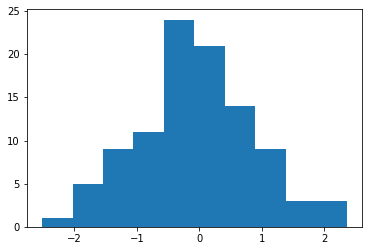

In [5]:
# this is how to check the distribution by histogram
plt.hist(x, bins=10)
plt.show()
# note : i just curious the data distribution look like

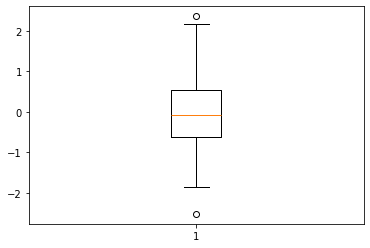

In [6]:
# this is how to plot boxplot in python
plt.boxplot(x)
plt.show()
# actually we can see the outliers from 2 above and -2 below 

Boxplot outliers detection applied to bivariate case

In [26]:
y = np.random.normal(0,1,100)
y

array([-0.35222435, -0.50273535,  1.46090369,  0.89961262,  1.46755246,
       -0.87940036,  1.35545761, -0.31329389, -1.24623253,  1.04063245,
        1.8759739 , -0.09800322, -0.39602408, -1.3816946 , -2.27487102,
       -0.3506756 , -0.10051808,  0.24014817, -0.64378743,  0.85720199,
       -2.61927691, -2.74988925,  0.54157371, -3.38051588,  0.34994035,
        0.52454399, -0.20627923, -0.66062291, -0.55422228,  0.07030905,
        1.2137524 ,  0.13293323, -0.24501201,  1.7723198 , -0.50626739,
        1.10144449,  0.48871848,  0.14728424, -0.05449983,  1.37290069,
       -0.99292036, -0.12779654, -0.18534564,  0.52426436, -0.05680708,
       -1.50666622, -3.33692323, -0.48070854, -1.71993595, -0.78867163,
        0.08976916,  0.2456217 , -0.39059404,  1.16249111,  0.83830593,
       -0.93032439,  0.13807351, -1.16247339, -0.55722603,  1.4791545 ,
       -0.13020382, -0.18353558, -0.3854104 , -1.15449185, -0.67371626,
       -0.51602167, -0.94214718,  0.68262142,  0.05702586, -1.99

In [27]:
y = pd.Series(y)
y.head()

0   -0.352224
1   -0.502735
2    1.460904
3    0.899613
4    1.467552
dtype: float64

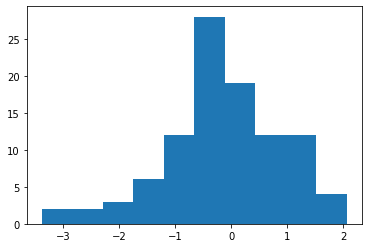

In [9]:
# this is how to check the distribution by histogram
plt.hist(y, bins=10)
plt.show()
# note : i just curious the data distribution look like

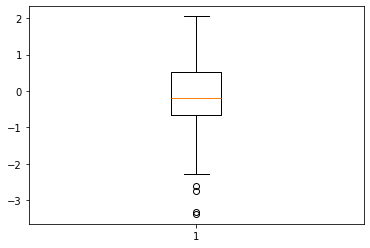

In [10]:
plt.boxplot(y)
plt.show()
# actually we can see the outliers from -2.xx to -3.xx

In [28]:
quartiles_x = x.quantile([0.25, 0.5, 0.75, 1])
quartiles_x

0.25   -0.608217
0.50   -0.081047
0.75    0.544889
1.00    2.358143
dtype: float64

In [29]:
quartiles_y = y.quantile([0.25, 0.5, 0.75, 1])
quartiles_y

0.25   -0.663896
0.50   -0.181249
0.75    0.520500
1.00    2.055529
dtype: float64

In [30]:
x_iqr = iqr(x)
y_iqr = iqr(y)

In [33]:
quartiles_x[0.25]

-0.6082173517977355

In [34]:
# min: q1 - 1.5*iqr
# max: q3 + 1.5*iqr
# X
minimum_outlier_x = quartiles_x[0.25] - 1.5*x_iqr
maximum_outlier_x = quartiles_x[0.75] + 1.5*x_iqr
# Y
minimum_outlier_y = quartiles_y[0.25] - 1.5*x_iqr
maximum_outlier_y = quartiles_y[0.75] + 1.5*x_iqr

In [ ]:
def x_outlier(data):
    list = []
    for dt in data:
        if dt > maximum_outlier_x:
            list.append(dt)
        elif dt < minimum_outlier_x:
            list.append(dt)
    return list

In [35]:
def y_outlier(data):
    list = []
    for dt in data:
        if dt > maximum_outlier_y:
            list.append(dt)
        elif dt < minimum_outlier_y:
            list.append(dt)
    return list

In [36]:
# checking the value of the outlier
x_out = x_outlier(x) 
print(x_out)
# below result are the outliers

[2.358143182266013, -2.5158868017189917]


In [37]:
# checking the value of the outlier
y_out = y_outlier(y) 
print(y_out)
# below result are the outliers

[-2.6192769118896795, -2.749889251064438, -3.3805158822608923, -3.336923230258747]


In [38]:
# converting into np array
x_out_np = np.asarray(x_out)
y_out_np = np.asarray(y_out)

In [39]:
print(x_out_np.shape)
print(y_out_np.shape)

(2,)
(4,)


In [17]:
# making shape same with x_out_np with y_out_np
x_out_np = list(x_out_np)
x_out_np = x_out_np + [0, 0]
# x_out_np

In [18]:
# converting the x_out_np from list to np.ndarray
x_out_np = np.asarray(x_out_np)
x_out_np

array([ 2.35814318, -2.5158868 ,  0.        ,  0.        ])

In [19]:
# making data frame base on column 
data = {'x' : x, 'y' : y} # column name and the data, ....

In [20]:
new_df = pd.DataFrame(data)
new_df

,x,y
0,0.054705,-0.352224
1,-0.244521,-0.502735
2,1.377259,1.460904
3,-0.058930,0.899613
4,-1.063171,1.467552
...,...,...
95,0.494395,-0.093297
96,-0.443371,-0.254507
97,-1.696746,0.393780
98,0.159516,1.137900


In [21]:
new_df.describe()

,x,y
count,100.000000,100.000000
mean,-0.063845,-0.151111
std,0.929410,1.085983
min,-2.515887,-3.380516
25%,-0.608217,-0.663896
50%,-0.081047,-0.181249
75%,0.544889,0.520500
max,2.358143,2.055529


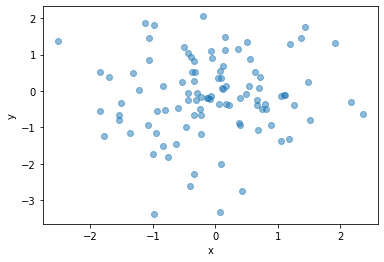

In [38]:
# scatter the data
plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

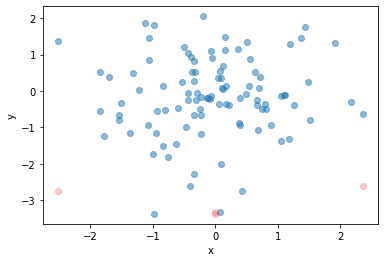

In [37]:
# experimental base on the formula
plt.scatter(x, y, alpha=0.5)
plt.scatter(x_out_np, y_out_np, alpha=0.2, c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## experiments

experimenting with other method

In [43]:
def estimate_gaussian(dataset,mu,std):
    mean = mu
    sigma = std
    limit = sigma * 1.5
    
    min_threshold = mean - limit
    max_threshold = mean + limit
    
    return max_threshold, min_threshold

In [44]:
mean_x = -0.063845
sigma_x = 0.929410
x_tresh = estimate_gaussian(x, mean_x, sigma_x)
x_tresh

(1.33027, -1.45796)

In [45]:
mean_y = -0.151111
sigma_y = 1.085983
y_tresh = estimate_gaussian(y, mean_y, sigma_y)
y_tresh

(1.4778635, -1.7800855)

In [51]:
x_np = np.asarray(x_tresh)
# print(type(x_np))
y_np = np.asarray(y_tresh)
# print(y_np.shape)

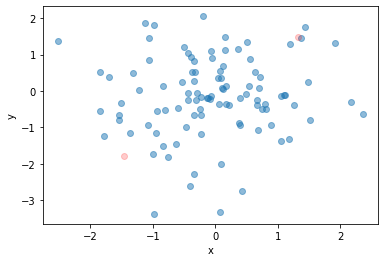

In [52]:
# experimental base on the formula
plt.scatter(x, y, alpha=0.5)
plt.scatter(x_np, y_np, alpha=0.2, c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
print(df.shape)
print(new_df.shape)
print(x_out_np.shape)

(10, 1)
(100, 2)
(4,)
